**Problem Statement**<br>
We are going to Predict that a person get the placement or not on the bases of his/her CGPA score and IQ level


In [100]:
#*******************Steps******************
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("placement.csv")

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [19]:
#skip unwanted column
df = df.iloc[:,1:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.duplicated().sum()

0

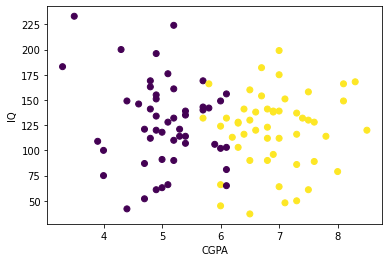

In [14]:
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [26]:
#Fetures Selection
x=df.iloc[:,0:2]#independent variable
y=df.iloc[:,-1] #independent variable


In [69]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [71]:
x_train1

,cgpa,iq
98,6.3,103.0
5,7.1,48.0
62,6.0,102.0
61,7.3,137.0
34,4.8,163.0
...,...,...
31,3.9,109.0
23,4.7,87.0
35,6.8,90.0
43,6.8,141.0


In [72]:
x_test1

,cgpa,iq
66,6.9,96.0
11,6.9,138.0
3,7.4,132.0
82,6.5,37.0
73,4.9,61.0
25,5.0,91.0
74,6.7,154.0
65,8.1,166.0
46,5.3,114.0
59,4.8,112.0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [79]:
x_train1=scaler.fit_transform(x_train1)
x_train1

array([[ 0.29689652, -0.55720772],
       [ 1.00007249, -1.94531956],
       [ 0.03320553, -0.58244612],
       [ 1.17586648,  0.30089778],
       [-1.02155842,  0.9570961 ],
       [ 0.03320553, -1.49102841],
       [ 0.20899952, -0.30482375],
       [ 0.12110253,  0.78042732],
       [-0.66997044,  2.49663832],
       [ 0.12110253, -0.55720772],
       [-0.93366142,  0.75518892],
       [ 0.29689652,  0.0737522 ],
       [-0.49417644, -0.45625413],
       [ 0.03320553, -0.02720138],
       [ 0.12110253, -1.51626681],
       [ 0.8242785 ,  0.35137457],
       [-0.66997044,  0.17470579],
       [-0.49417644,  0.25042098],
       [-1.02155842,  0.40185137],
       [-1.19735241,  0.52804335],
       [ 0.03320553, -2.02103475],
       [-0.14258846,  1.03281129],
       [ 0.91217549,  0.35137457],
       [-0.58207344, -0.10291657],
       [ 1.00007249,  0.65423534],
       [ 0.7363815 , -0.05243978],
       [ 1.61535146, -0.27958535],
       [ 1.35166047,  0.124229  ],
       [ 0.91217549,

In [82]:
x_test1=scaler.fit_transform(x_test1)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
clf = LogisticRegression()

In [87]:
# model training
clf.fit(x_train1,y_train)

LogisticRegression()

In [88]:
y_pred = clf.predict(x_test1)

In [89]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,y_pred)

1.0

In [99]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

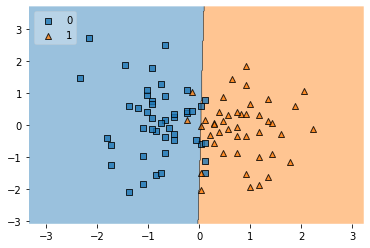

In [98]:
plot_decision_regions(x_train1, y_train.values, clf=clf, legend=2)